In [2]:
from keras.datasets import imdb

In [3]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

17465344/17464789 [==============================] - 0s 0us/step


In [4]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [5]:
train_labels[0]

1

In [6]:
max([max(sequence) for sequence in train_data])

9999

In [7]:
import numpy as np

In [8]:
# create all zero matrix 
def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1
    return results

In [9]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [10]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [11]:
y_train = np.asarray(train_labels).astype('float32')


In [12]:
y_test = np.asarray(train_labels).astype('float32')


In [13]:
from keras import models
from keras import layers

In [14]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [15]:
from keras import optimizers
from keras import losses
from keras import metrics

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss=losses.binary_crossentropy,
              metrics=metrics.binary_accuracy)

In [16]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [17]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 1s 45ms/step - loss: 0.6932 - binary_accuracy: 0.5035 - val_loss: 0.6932 - val_binary_accuracy: 0.4947
Epoch 2/20
30/30 [==============================] - 1s 31ms/step - loss: 0.6931 - binary_accuracy: 0.5035 - val_loss: 0.6932 - val_binary_accuracy: 0.4947
Epoch 3/20
30/30 [==============================] - 1s 31ms/step - loss: 0.6931 - binary_accuracy: 0.5035 - val_loss: 0.6932 - val_binary_accuracy: 0.4947
Epoch 4/20
30/30 [==============================] - 1s 32ms/step - loss: 0.6931 - binary_accuracy: 0.5035 - val_loss: 0.6932 - val_binary_accuracy: 0.4947
Epoch 5/20
30/30 [==============================] - 1s 31ms/step - loss: 0.6931 - binary_accuracy: 0.5035 - val_loss: 0.6933 - val_binary_accuracy: 0.4947
Epoch 6/20
30/30 [==============================] - 1s 31ms/step - loss: 0.6931 - binary_accuracy: 0.5035 - val_loss: 0.6933 - val_binary_accuracy: 0.4947
Epoch 7/20
30/30 [==============================] - 1s 31ms/step - los

In [18]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'binary_accuracy', 'val_loss', 'val_binary_accuracy'])

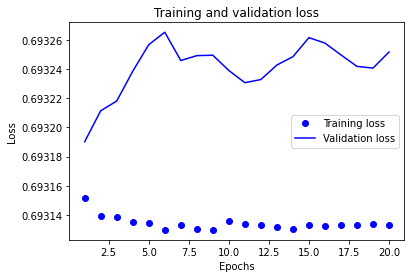

In [19]:
import matplotlib.pyplot as plt

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc = history_dict['binary_accuracy']

epochs = range(1, len(acc) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [22]:
# plt.clf()
# acc = history_dict['binary_accuracy']
# acc_vals = history_dict['val_binary_accuracy']
# plt.plot(epochs, acc, 'bo', label='Training acc')
# plt.plot(epochs, acc_vals, 'b', label='Validation acc')
# plt.title('Training and validation accuracy')
# plt.xlabel('Epochs')
# plt.ylabel('Loss')
# plt.legend()
# plt.show()

In [26]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [29]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [30]:
model.fit(x_train, y_train, epochs=4, batch_size=512)

Epoch 1/4
49/49 [==============================] - 1s 23ms/step - loss: 0.6932 - accuracy: 0.4969
Epoch 2/4
49/49 [==============================] - 1s 23ms/step - loss: 0.6931 - accuracy: 0.4980
Epoch 3/4
49/49 [==============================] - 1s 23ms/step - loss: 0.6931 - accuracy: 0.4977
Epoch 4/4
49/49 [==============================] - 1s 23ms/step - loss: 0.6932 - accuracy: 0.4971


In [31]:
results = model.evaluate(x_test, y_test)
results

782/782 [==============================] - 1s 2ms/step - loss: 0.6931 - accuracy: 0.5000


[0.6931402087211609, 0.5000399947166443]

In [32]:
model.predict(x_test)

array([[0.58896756],
       [0.4997051 ],
       [0.4997051 ],
       ...,
       [0.4997051 ],
       [0.4997051 ],
       [0.4997051 ]], dtype=float32)